## Introduction

In this mission, we'll learn how to use and write context managers, a type of function that sets up a context for your code to run in, runs your code, and then removes the context. That's not a very helpful definition though, so let's start by looking at an analogy.

Imagine that you are throwing a fancy party, and have hired some caterers to provide refreshments for your guests.

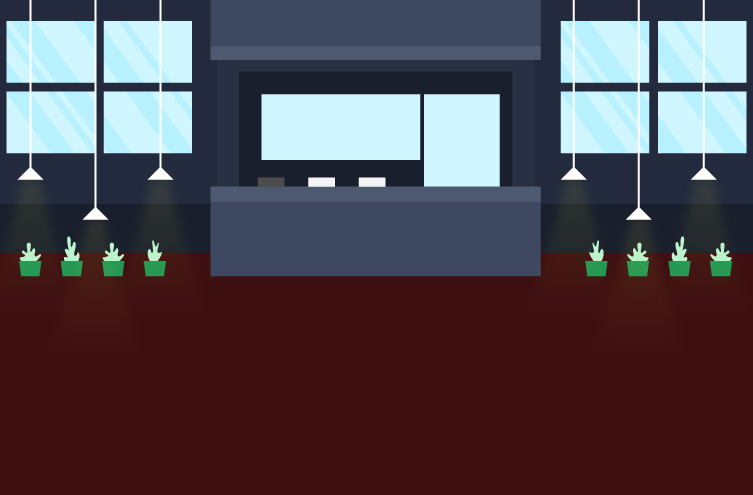

Before the party starts, the caterers set up tables with food and drinks.

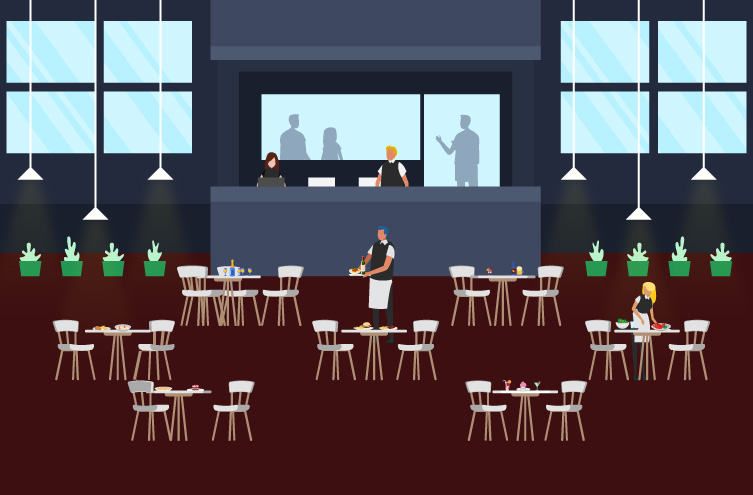

Then you and your friends dance, eat, and have a good time.

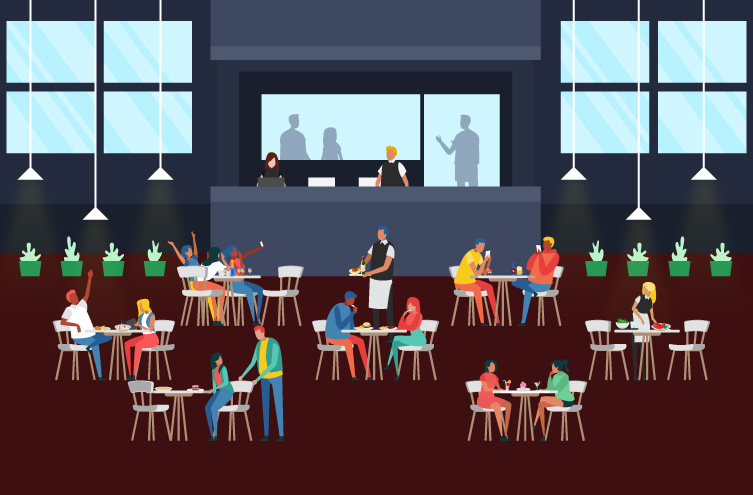

When the party is done, the caterers clean up the food and remove the tables.

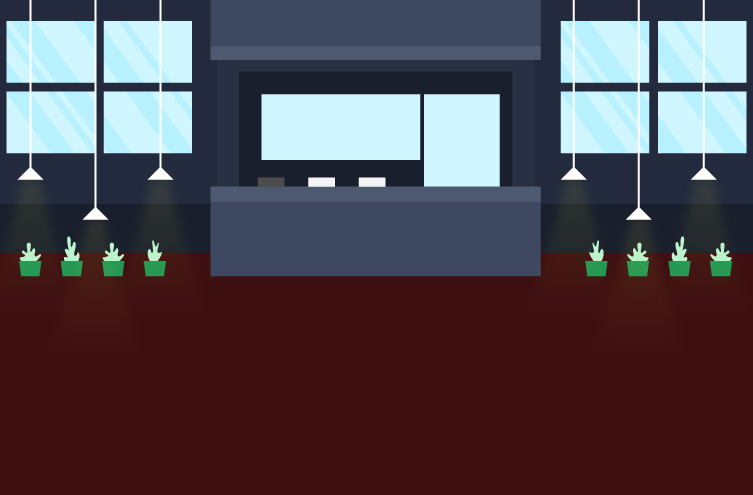

In this analogy, the caterers are like a context manager.

Context managers:

- Set up a context
- Run your code
- Remove the context

First, the caterers set up a context for your party, which was a room full of food and drinks. Then they let you and your friends do whatever you want. This is like you being able to run your code inside the context manager's context. Finally, when the party is over, the caterers clean up and remove the context in which the party happened.

### Using context managers

You may have already used context managers without even realizing it. For example, the `open()` function is a context manager. `open()` does three things:

- Sets up a context by opening a file
- Lets you run any code you want on that file
- Removes the context by closing the file

When we write `with open()`, it opens a file that we can read from or write to. Then, it gives control back to our code, so that we can perform operations on the file object.

In [ ]:
with open('my_file.txt') as my_file:
    text = my_file.read()
    length = len(text)

print('The file is {} characters long'.format(length))

In the example above, we read the text of the file, store the contents of the file in the variable text, and store the length of the contents in the variable length. When the code inside the indented block is done, the open() function makes sure that the file is closed before continuing on in the script. The print statement is outside of the context, so by the time it runs, the file is closed.


**Let's take a closer look at the syntax next.**

Any time we use a context manager, it will look like this. The keyword with lets Python know that we are trying to enter a context:

```
with
```

Then we call a function. We can call any function that is built to work as a context manager.

```
with <context-manager>()
```

A context manager can also take arguments like any normal function:
```
with <context-manager>(<args>)
```

We end the with statement with a colon, as if we were writing a for loop or an if statement:
```
with <context-manager>(<args>):
```

Statements in Python that have an indented block after them, like for loops, if/else statements, function definitions, etc. are called **compound statements**. The with statement is another type of compound statement. Any code that we want to run inside the context that the context manager created needs to be indented.

```
with <context-manager>(<args>):
  # Run your code here
  # This code is running "inside the context"
```

When the indented block is done, the context manager gets a chance to clean up anything that it needs to, like when the `open()` context manager closed the file.

``` 
with <context-manager>(<args>):
  # Run your code here
  # This code is running "inside the context"

# This code runs after the context is removed
```

Some context managers want to return a value that you can use inside the context. By adding as and a variable name at the end of the with statement, we can assign the returned value to the variable name.

```
with <context-manager>(<args>) as <variable-name>:
  # Run your code here
  # This code is running "inside the context"

# This code runs after the context is removed
```

We used this ability when calling the open() context manager, which returns a file that we can read from or write to. By adding as my_file to the with statement, we can assign the file to the variable my_file.

In [ ]:
with open('my_file.txt') as my_file:
    text = my_file.read()
    length = len(text)

print('The file is {} characters long'.format(length))

### Writing context managers

Now that we know how to use context managers, let's learn how to write a context manager for other people to use.

There are two ways to define a context manager in Python:

1. By using a class that has special __enter__() and __exit__() methods
2. By decorating a certain kind of function

Since this course is focused on writing functions, we'll only present the function-based method here.

There are five parts to creating a context manager:

1. Define a function.
2. (*optional*) Add any setup code your context needs.
3. Use the yield keyword to signal to Python that this is a special kind of function.
4. (*optional*) Add any teardown code needed to clean up the context.
5. Add the @contextlib.contextmanager decorator.

In [ ]:
@contextlib.contextmanager
def my_context():
  # Add any set up code you need

  yield

  # Add any teardown code you need

In the last step, we must decorate the function with the contextmanager decorator from the contextlib module. You might not know what a decorator is, and that's okay. We will discuss decorators in depth in the next mission of this course. For now, the important thing to know is that you write the @ symbol, followed by contextlib.contextmanager on the line immediately above your context manager function:

In [3]:
import contextlib

@contextlib.contextmanager
def my_context():
    print('hello')

    yield 42

    print('goodbye')

The `yield` keyword may also be new to you. When we write this word, **it means that we are going to return a value, but we expect to finish the rest of the function at some point in the future.**

The value that our context manager yields can be assigned to a variable in the `with` statement by adding `as `. Here, we've assigned the value `42` that `my_context()` yields to the variable `foo`.

By running this code, we can see that after the context block is done executing, the rest of the my_context() function runs, printing "goodbye".

In [4]:
with my_context() as foo:
    print('foo is {}'.format(foo))

hello
foo is 42
goodbye


You may recognize the **yield** keyword as a thing that gets used when creating generators. In fact, **a context manager function is technically a generator that yields a single value**. If you aren't familiar with generators, don't worry - you won't need knowledge of generators to complete this course.

Some context managers don't yield an explicit value. For example, `in_dir()` below is a context manager that changes the current working directory to a specific path and then changes it back after the context block is done. It does not need to return anything with its yield statement.

In [5]:
@contextlib.contextmanager
def in_dir(path):
    # save current working directory
    old_dir = os.getcwd()

    # switch to new working directory
    os.chdir(path)

    yield

    # change back to previous
    # working directory
    os.chdir(old_dir)

In [ ]:
with in_dir('/data/project_1/'):
    project_files = os.listdir()

The context manager below is an example of code that accesses a database. Like most context managers, it has some setup code that runs before the function yields. This context manager uses that setup code to connect to the database.

In [ ]:
@contextlib.contextmanager
def database(url):
    # set up database connection
    db = postgres.connect(url)

    yield db

    # tear down database connection
    db.disconnect()

In [ ]:
url = 'http://dataquest.io/data'
with database(url) as my_db:
    course_list = my_db.execute('SELECT * FROM courses')

Most context managers also have some teardown or cleanup code when they get control back after yielding. This one uses the teardown section to disconnect from the database.

This setup/teardown behavior allows a context manager to hide things like connecting and disconnecting from a database, so that a programmer using the context manager can just perform operations on the database without worrying about the underlying details.

The `database()` context manager that we've been looking at yields a specific value - the database connection - that can be used in the context block.

### Nested contexts

Next, let's look at how we can use nested contexts.

Imagine we are implementing a function that copies the contents of one file to another file. One way we could write this function would be to open the source file, store the contents of the file in the contents variable, then open the destination file and write the contents to it.

In [7]:
def copy(src, dst):
    """Copy the contents of one file to another.

    Args:
      src (str): File name of the file to be copied.
      dst (str): Where to write the new file.
    """
    # Open the source file and read in the contents
    with open(src) as f_src:
        contents = f_src.read()

    # Open the destination file and write out the contents
    with open(dst, 'w') as f_dst:
        f_dst.write(contents)

This approach works fine until we try to copy a file that is **too large to fit in memory**.

What would be ideal is if we could open both files at once and copy over one line at a time.

Fortunately for us, the file object that the open() context manager returns can be iterated over in a for loop. The statement for line in my_file here will read in the contents of my_file one line at a time until the end of the file.

In [ ]:
with open('my_file.txt') as my_file:
    for line in my_file:
      # do something

So, going back to our copy() function, if we could open both files at once, we could read in the source file line-by-line and write each line out to the destination as we go. This would let us copy the file without worrying about how big it is.

In Python, nested with statements are perfectly legal. This code opens the source file, and then opens the destination file inside the source file's context.

In [8]:
def copy(src, dst):
    """Copy the contents of one file to another.

    Args:
      src (str): File name of the file to be copied.
      dst (str): Where to write the new file.
    """
    # Open both files
    with open(src) as f_src:
        with open(dst, 'w') as f_dst:
            # Read and write each line, one at a time
            for line in f_src:
                f_dst.write(line)

That means code that runs inside the context created by opening the destination file has access to both the f_src and the f_dst file objects. So we are able to copy the file over one line at a time like we wanted to!

### Handling errors

One thing you will want to think about when writing your context managers is: What happens if the programmer who uses your context manager writes code that causes an error?

Imagine we've written this function that lets someone connect to the printer. The printer only allows one connection at a time, so it is imperative that p.disconnect() gets called, or else no one else will be able to print!

In [9]:
def get_printer(ip):
    p = connect_to_printer(ip)

    yield p

    # This MUST be called or no one else will
    # be able to connect to the printer 
    p.disconnect()

Someone decides to use our get_printer() function to print the text of their document. However, they weren't paying attention and accidentally typed txt instead of text.

In [ ]:
doc = {'text': 'This is my text.'}

with get_printer('10.0.34.111') as printer:
    printer.print_page(doc['txt'])

This will raise a KeyError because txt is not in the doc dictionary. And that means p.disconnect() doesn't get called.

```
Traceback (most recent call last):
    File "<stdin>", line 1, in <module>
      printer.print_page(doc['txt'])
KeyError: 'txt'
```


So what can we do? You may be familiar with the try statement. It allows us to write code that might raise an error inside the try block and catch that error inside the except block. We can choose to ignore the error or re-raise it.

```
try:
  # code that might raise an error
except:
  # do something about the error
```

The try statement also allows us to add a finally block. This is code that runs no matter what, whether an exception occured or not.
```
try:
  # code that might raise an error
except:
  # do something about the error
finally:
  # this code runs no matter what
```

The solution then is to put a `try` statement before the `yield` statement in our `get_printer()` function and a finally statement before `p.disconnect()`.

In [11]:
def get_printer(ip):
    p = connect_to_printer(ip)

    try:
        yield
    finally:
        p.disconnect()

When the sloppy programmer runs their code, they still get the KeyError, but finally ensures that p.disconnect() is called before the error is raised.

## When to create context managers

Another question you may be wondering about is: when should I create a context manager? If you notice that your code is following any of these patterns, consider using a context manager:

- OPEN/CLOSE
- LOCK/RELEASE
- CHANGE/RESET
- ENTER/EXIT
- START/STOP
- SETUP/TEARDOWN
- CONNECT/DISCONNECT

For instance, in this mission we've talked about open(), which uses the open/close pattern, and get_printer(), which uses the connect/disconnect pattern. See if you can find other instances of these patterns in code you are familiar with.